In [1]:
# IMDB using LTSM + reversed sequences

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

Using TensorFlow backend.


In [3]:
max_features = 100000
maxlen = 500

In [4]:
(x_train, y_train), (x_test,y_test) = imdb.load_data(num_words=max_features)

x_train = [x[::-1] for x in x_train]
x_test =[x[::-1] for x in x_test]

x_train = sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = sequence.pad_sequences(x_test, maxlen = maxlen)



In [5]:
model_lstm_rs = Sequential()
model_lstm_rs.add(layers.Embedding(max_features,128))
model_lstm_rs.add(layers.LSTM(32))
model_lstm_rs.add(layers.Dense(1, activation='sigmoid'))

model_lstm_rs.compile(optimizer='rmsprop',
             loss ='binary_crossentropy',
             metrics=['acc'])

history_1= model_lstm_rs.fit(x_train,y_train,
                   epochs = 10,
                   batch_size=128,
                   validation_split =0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 145s 7ms/step - loss: 0.4812 - acc: 0.7726 - val_loss: 0.3758 - val_acc: 0.8546
Epoch 2/10
20000/20000 [==============================] - 141s 7ms/step - loss: 0.2723 - acc: 0.8996 - val_loss: 0.3740 - val_acc: 0.8402
Epoch 3/10
20000/20000 [==============================] - 140s 7ms/step - loss: 0.1927 - acc: 0.9328 - val_loss: 0.3659 - val_acc: 0.8524
Epoch 4/10
20000/20000 [==============================] - 128s 6ms/step - loss: 0.1402 - acc: 0.9533 - val_loss: 0.3897 - val_acc: 0.8818
Epoch 5/10
20000/20000 [==============================] - 124s 6ms/step - loss: 0.1110 - acc: 0.9620 - val_loss: 0.3765 - val_acc: 0.8762
Epoch 6/10
20000/20000 [==============================] - 139s 7ms/step - loss: 0.0848 - acc: 0.9734 - val_loss: 0.4306 - val_acc: 0.8480
Epo

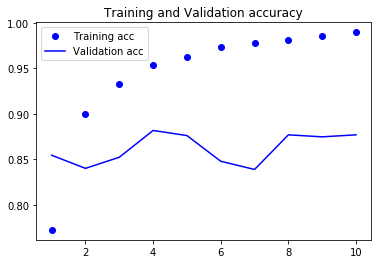

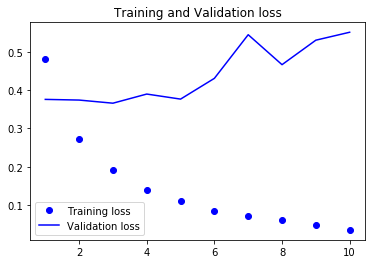

In [7]:
import matplotlib.pyplot as plt

acc = history_1.history['acc']
val_acc= history_1.history['val_acc']
epochs = range(1, len(acc) +1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()


loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) +1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [8]:
model_lstm_rs.evaluate(x_test,y_test)

25000/25000 [==============================] - 150s 6ms/step


[0.7257677564942837, 0.83524]

In [9]:
#Using bidirectional LSTM
model_lstm_rs_bd = Sequential()
model_lstm_rs_bd.add(layers.Embedding(max_features,128))
model_lstm_rs_bd
model_lstm_rs_bd.add(layers.LSTM(32))
model_lstm_rs_bd.add(layers.Dense(1, activation='sigmoid'))

model_lstm_rs_bd.compile(optimizer='rmsprop',
             loss ='binary_crossentropy',
             metrics=['acc'])

history_2 = model_lstm_rs_bd.fit(x_train,y_train,
                   epochs = 10,
                   batch_size=128,
                   validation_split =0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 133s 7ms/step - loss: 0.4852 - acc: 0.7671 - val_loss: 0.3165 - val_acc: 0.8830
Epoch 2/10
20000/20000 [==============================] - 150s 7ms/step - loss: 0.2738 - acc: 0.8994 - val_loss: 0.6650 - val_acc: 0.8056
Epoch 3/10
20000/20000 [==============================] - 143s 7ms/step - loss: 0.1845 - acc: 0.9378 - val_loss: 0.4614 - val_acc: 0.8122
Epoch 4/10
20000/20000 [==============================] - 137s 7ms/step - loss: 0.1410 - acc: 0.9517 - val_loss: 0.6430 - val_acc: 0.7398
Epoch 5/10
20000/20000 [==============================] - 150s 7ms/step - loss: 0.1145 - acc: 0.9625 - val_loss: 0.4337 - val_acc: 0.8566
Epoch 6/10
20000/20000 [==============================] - 135s 7ms/step - loss: 0.0900 - acc: 0.9709 - val_loss: 0.3931 - val_acc: 0.8466
Epoch 7/10
20000/20000 [==============================] - 145s 7ms/step - loss: 0.0725 - acc: 0.9775 - val_loss: 0.5131 - v

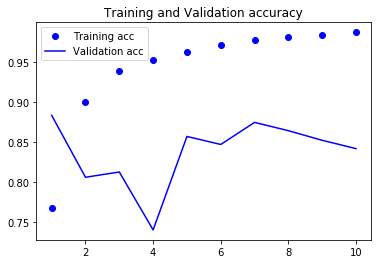

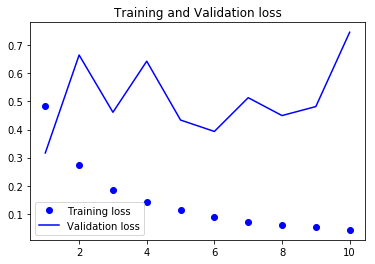

In [10]:
import matplotlib.pyplot as plt

acc = history_2.history['acc']
val_acc= history_2.history['val_acc']
epochs = range(1, len(acc) +1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()


loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) +1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [11]:
model_lstm_rs_bd.evaluate(x_test,y_test)

25000/25000 [==============================] - 131s 5ms/step


[0.84307445789814, 0.81584]